In [30]:
import numpy as np
import pandas as pd

amex_df = pd.read_csv('../chapter4/gen/amex_df.csv',
                           parse_dates=True,
                           index_col=0)

# Show Demo
demo_list = np.array([2, 
                      4, 
                      16, 
                      20])
# Use 3 days as period
demo_window = 3
# pd.roling_std * np.sqrt
df = pd.DataFrame(demo_list)
df.rolling(demo_window).std() * np.sqrt(demo_window)

,0
0,NaN
1,NaN
2,13.114877
3,14.422205


In [31]:
pd.Series([2,
           4,
           16]).std() * np.sqrt(demo_window)

13.114877048604002

In [32]:
pd.Series([4,
           16,
           20]).std() * np.sqrt(demo_window)


14.422205101855958

In [33]:
np.sqrt(pd.Series([2, 
        4, 
        16]).var() * demo_window)

13.114877048604002

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113a2fb00>,
      dtype=object)

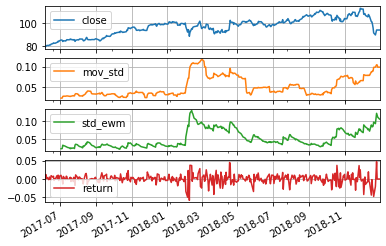

In [34]:
amex_df_copy = amex_df.copy()
# ROI
amex_df_copy['return'] = np.log(amex_df['close'] / amex_df['close'].shift(1))
# Rolling Standard Deviation
amex_df_copy['mov_std'] = amex_df_copy['return'].rolling(window=20,
                                               center=False).std() * np.sqrt(20)
# Weighted Moving STD is very close to Moving STD
amex_df_copy['std_ewm'] = amex_df_copy['return'].ewm(span=20,
                                                     min_periods=20,
                                                     adjust=True).std() * np.sqrt(20)

amex_df_copy[['close', 
              'mov_std', 
              'std_ewm', 
              'return']].plot(
    subplots=True, 
    grid=True
)